In [9]:
# Standard libraries
import numpy as np
import json
import h5py
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, mannwhitneyu
from ipywidgets import interactive, IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.metric.metric import MetricCalculator
from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from mesostat.utils.pandas_helper import get_one_row
import mesostat.stat.connectomics as connectomics

# User libraries
from lib.sych.data_fc_db import DataFCDatabase

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
params['root_path_data']  = gui_fpath("Path to data collection",  './')
#params['root_path_paw']   = gui_fpath("Path to Paw data",         params['root_path_data'])
#params['root_path_lick']  = gui_fpath("Path to Lick data",        params['root_path_paw'])
#params['root_path_whisk'] = gui_fpath("Path to Whisk Data",       params['root_path_lick'])
params['root_path_te']    = gui_fpath("Select TE results folder", params['root_path_data'])

In [26]:
dataDB = DataFCDatabase(params)

Target trial within [0, 8] sec. Total target timesteps 161
Searching for TE files
Total user files in dataset raw_delay_3_window_4 is 774
Searching for channel labels
Searching for data files
No paw path provided, skipping
No lick path provided, skipping
No whisk path provided, skipping


In [27]:
dataDB.read_te_files()
dataDB.read_neuro_files()
dataDB.read_resample_paw_files()
dataDB.read_resample_lick_files()   # Currently does not work. Ask Yaro if we need it
dataDB.read_resample_whisk_files()

IntProgress(value=0, description='Reading TE files', max=774)

IntProgress(value=0, description='Read Neuro Data:', max=220)

Calculated performance 0.7264150943396226 does not match external 0.7333333333333333
Calculated performance 0.803680981595092 does not match external 0.808641975308642
Calculated performance 0.8411764705882353 does not match external 0.8436578171091446
Calculated performance 0.956989247311828 does not match external 0.9621621621621622
Calculated performance 0.6808510638297872 does not match external 0.6956521739130435
Calculated performance 0.9582366589327146 does not match external 0.9604651162790697
Calculated performance 0.4851258581235698 does not match external 0.4840182648401826
--Warning: For iMISS behaviour max index 437 exceeds nTrials 437
---Cropped excessive behaviour trials from 86 to 85
Calculated performance 0.42795389048991356 does not match external 0.6902017291066282
Calculated performance 0.2534562211981567 does not match external 0.30386740331491713
Calculated performance 0.4444444444444444 does not match external 0.47227191413237923
Calculated performance 0.56680161

--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_8 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_8 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyosha/Data/TE_data/yarodata/neuro/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/alyos

In [28]:
pTHR = 0.7
dataDB.mark_days_expert_naive(pTHR)

In [29]:
mice48 = {'mvg_4', 'mvg_7', 'mvg_8', 'mvg_9'}
mice12 = {
 'mtp_1',
 'mtp_10',
 'mtp_11',
 'mtp_12',
 'mtp_13',
 'mtp_15',
 'mtp_16',
 'mtp_2',
 'mtp_7',
 'mvg_2',
 'mvg_3',
 'mvg_5',
 'mvg_6'}

In [30]:
def fit_sliding_window(x, y, win, nStep):
    xStepLst = np.linspace(x[0], x[-1]-win, nStep)
    yStepLst = []
    for xStep in xStepLst:
        idxs = np.logical_and(x >= xStep, x <= xStep+win)
        yStepLst += [np.mean(y[idxs])]
        
    return xStepLst + win/2, np.array(yStepLst)

def pandas_df_from_dict_non_uniform(d):
    maxsize = np.max([len(v) for v in d.values()])
    pad_func = lambda v: np.pad(v, pad_width=(0, maxsize-len(v), ), mode='constant', constant_values=None)
    return pd.DataFrame({k: pad_func(v) for k,v in d.items()}) 

links_vs_snr_All_MultivariateTE_12_indegree
Scatter: nData 3276 -log10(Pval) 33.71
Binary: nGood 2085 nNoisy 1191 mu(good) 0.28 mu(noisy) 0.41 -log10(pVal) 16.31


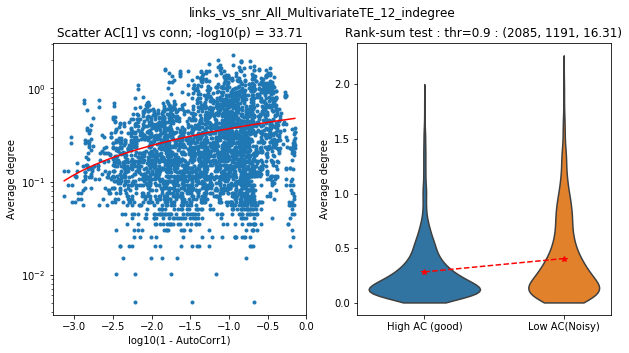

links_vs_snr_GP_MultivariateTE_12_indegree
Scatter: nData 270 -log10(Pval) 1.08
Binary: nGood 174 nNoisy 96 mu(good) 0.25 mu(noisy) 0.23 -log10(pVal) 1.63


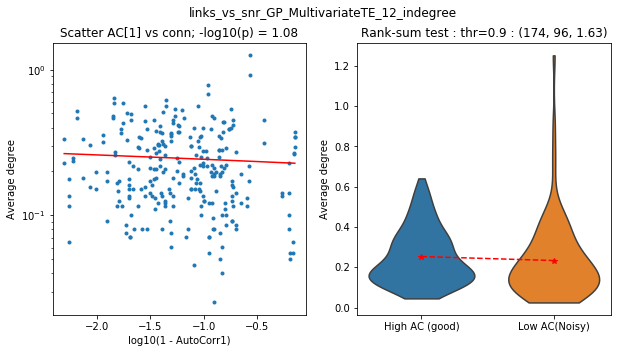

links_vs_snr_DG_MultivariateTE_12_indegree
Scatter: nData 235 -log10(Pval) 17.74
Binary: nGood 165 nNoisy 70 mu(good) 0.17 mu(noisy) 0.44 -log10(pVal) 5.89


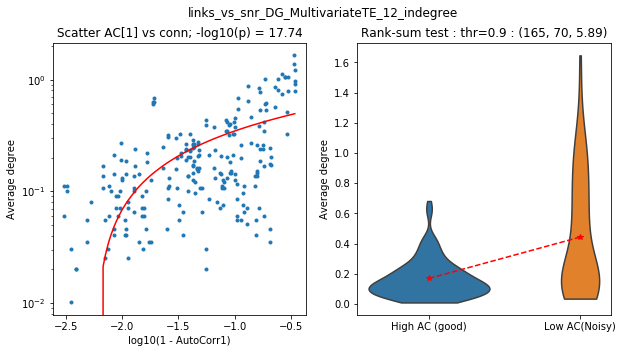

links_vs_snr_DG_a_MultivariateTE_12_indegree
links_vs_snr_VL_MultivariateTE_12_indegree
Scatter: nData 194 -log10(Pval) 6.76
Binary: nGood 124 nNoisy 70 mu(good) 0.3 mu(noisy) 0.47 -log10(pVal) 5.25


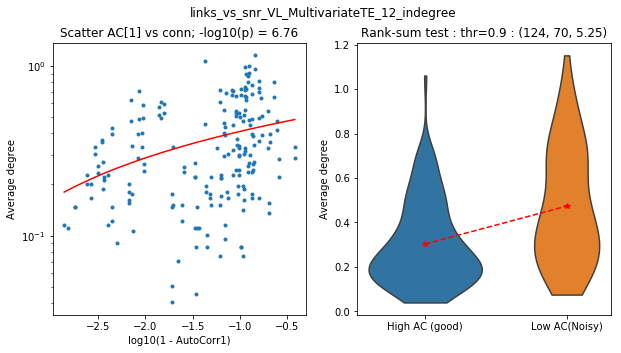

links_vs_snr_Cpu_MultivariateTE_12_indegree
Scatter: nData 210 -log10(Pval) 7.21
Binary: nGood 131 nNoisy 79 mu(good) 0.2 mu(noisy) 0.37 -log10(pVal) 2.32


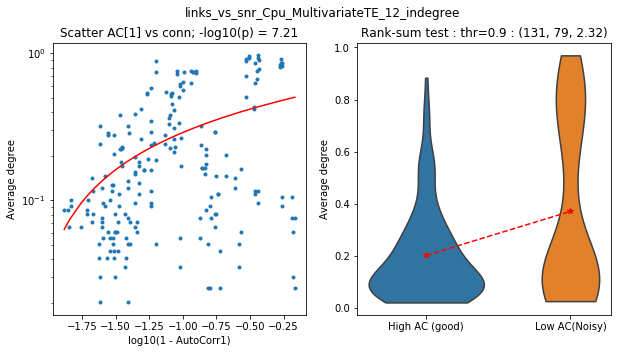

links_vs_snr_CA1_Py_MultivariateTE_12_indegree
Scatter: nData 287 -log10(Pval) 2.46
Binary: nGood 203 nNoisy 84 mu(good) 0.25 mu(noisy) 0.36 -log10(pVal) 2.79


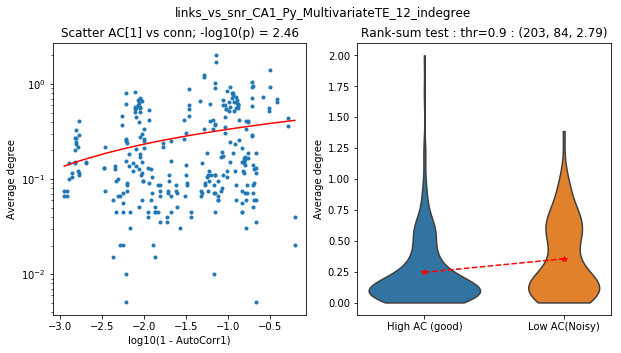

links_vs_snr_S1_bf_MultivariateTE_12_indegree
Scatter: nData 350 -log10(Pval) 0.1
Binary: nGood 173 nNoisy 177 mu(good) 0.3 mu(noisy) 0.25 -log10(pVal) 1.23


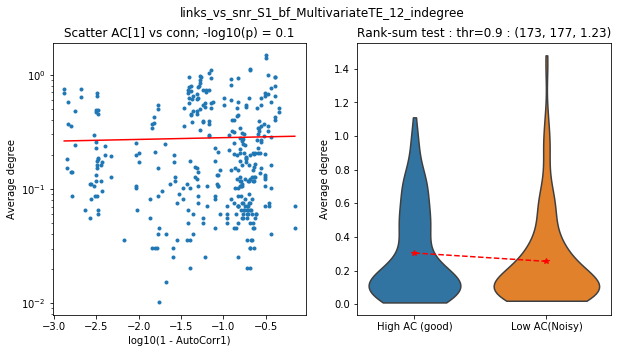

links_vs_snr_VM_MultivariateTE_12_indegree
Scatter: nData 194 -log10(Pval) 2.01
Binary: nGood 146 nNoisy 48 mu(good) 0.39 mu(noisy) 0.34 -log10(pVal) 0.48


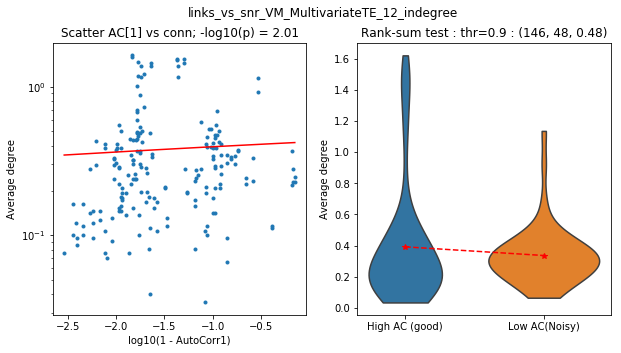

links_vs_snr_LDVL_MultivariateTE_12_indegree
Scatter: nData 159 -log10(Pval) 0.33
Binary: nGood 69 nNoisy 90 mu(good) 0.26 mu(noisy) 0.42 -log10(pVal) 1.31


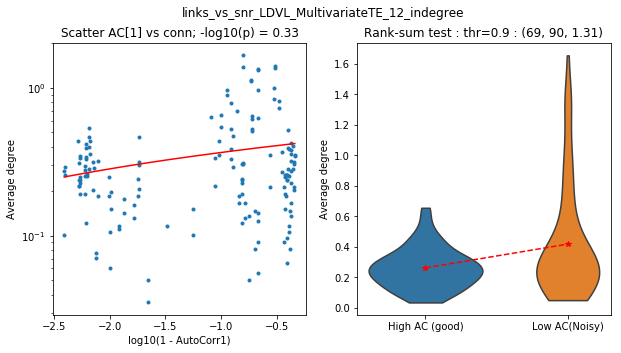

links_vs_snr_Rt_MultivariateTE_12_indegree
Scatter: nData 235 -log10(Pval) 7.61
Binary: nGood 119 nNoisy 116 mu(good) 0.24 mu(noisy) 0.41 -log10(pVal) 7.86


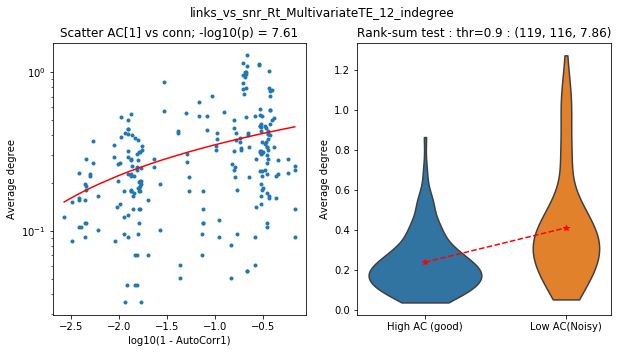

links_vs_snr_M1_MultivariateTE_12_indegree
Scatter: nData 250 -log10(Pval) 4.63
Binary: nGood 188 nNoisy 62 mu(good) 0.31 mu(noisy) 0.46 -log10(pVal) 1.23


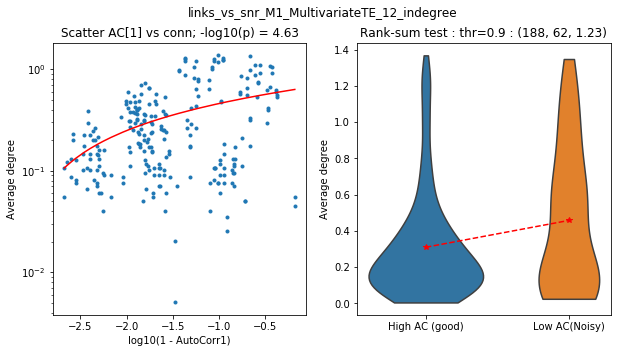

links_vs_snr_M1_l_MultivariateTE_12_indegree
links_vs_snr_CA1_Mol_MultivariateTE_12_indegree
Scatter: nData 182 -log10(Pval) 3.23
Binary: nGood 123 nNoisy 59 mu(good) 0.2 mu(noisy) 0.28 -log10(pVal) 2.85


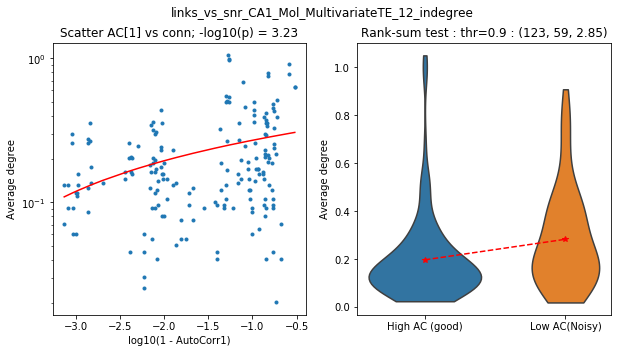

links_vs_snr_dCA1_MultivariateTE_12_indegree
Scatter: nData 82 -log10(Pval) 3.97
Binary: nGood 55 nNoisy 27 mu(good) 0.42 mu(noisy) 0.55 -log10(pVal) 1.29


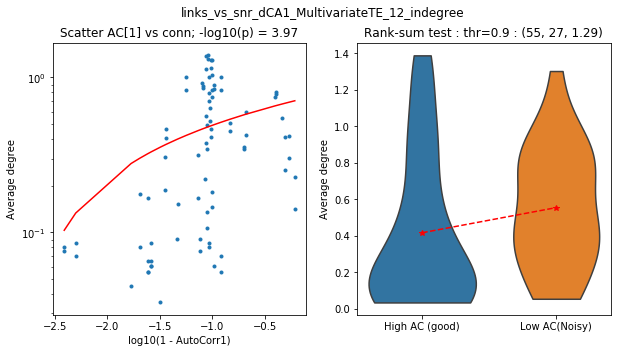

links_vs_snr_All_MultivariateTE_48_indegree
Scatter: nData 5376 -log10(Pval) 94.11
Binary: nGood 4953 nNoisy 423 mu(good) 0.25 mu(noisy) 0.43 -log10(pVal) 46.24


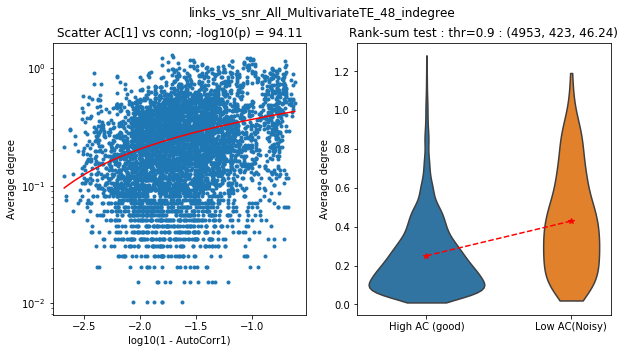

links_vs_snr_GP_MultivariateTE_48_indegree
Scatter: nData 112 -log10(Pval) 0.08
Binary: nGood 102 nNoisy 10 mu(good) 0.24 mu(noisy) 0.74 -log10(pVal) 6.28


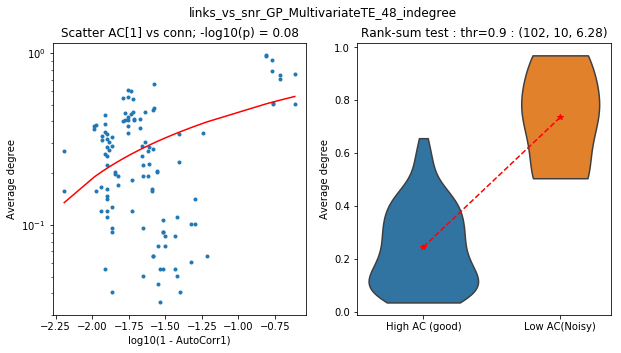

links_vs_snr_DG_MultivariateTE_48_indegree
links_vs_snr_DG_a_MultivariateTE_48_indegree
Scatter: nData 112 -log10(Pval) 4.32
Binary: nGood 100 nNoisy 12 mu(good) 0.39 mu(noisy) 0.53 -log10(pVal) 0.82


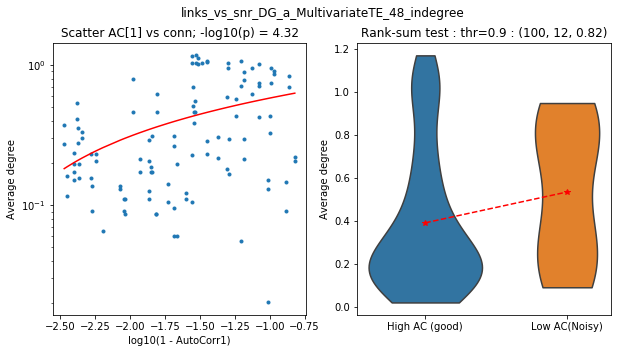

links_vs_snr_VL_MultivariateTE_48_indegree
Scatter: nData 112 -log10(Pval) 2.81
Binary: nGood 102 nNoisy 10 mu(good) 0.3 mu(noisy) 0.47 -log10(pVal) 2.65


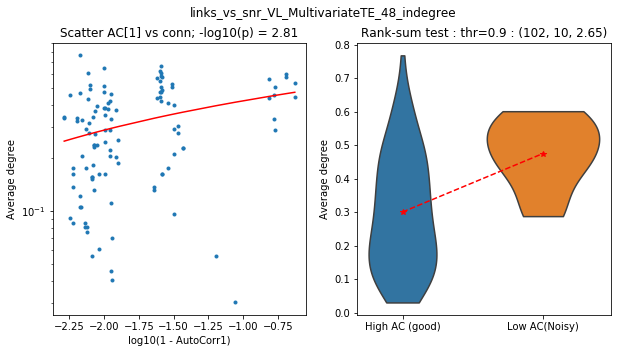

links_vs_snr_Cpu_MultivariateTE_48_indegree
Scatter: nData 224 -log10(Pval) 1.27
Binary: nGood 202 nNoisy 22 mu(good) 0.18 mu(noisy) 0.15 -log10(pVal) 0.79


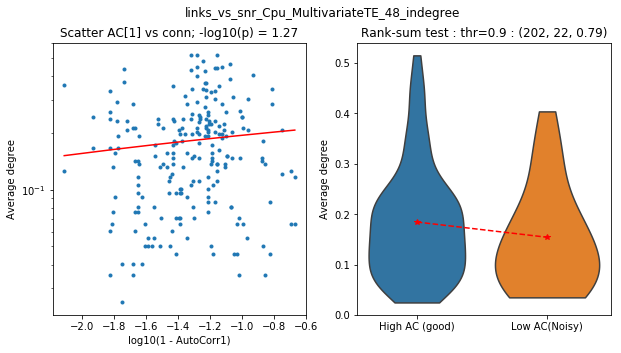

links_vs_snr_CA1_Py_MultivariateTE_48_indegree
Scatter: nData 112 -log10(Pval) 16.38
Binary: nGood 102 nNoisy 10 mu(good) 0.33 mu(noisy) 0.67 -log10(pVal) 3.36


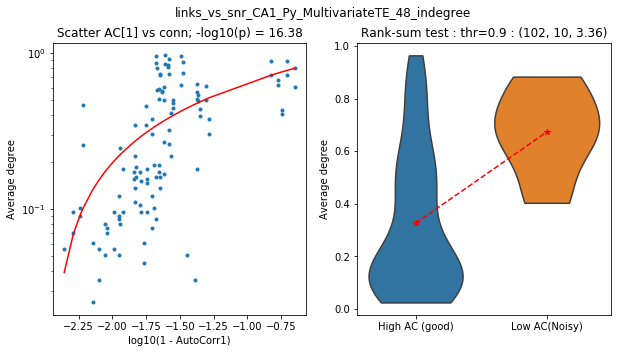

links_vs_snr_S1_bf_MultivariateTE_48_indegree
Scatter: nData 224 -log10(Pval) 3.46
Binary: nGood 203 nNoisy 21 mu(good) 0.27 mu(noisy) 0.17 -log10(pVal) 2.0


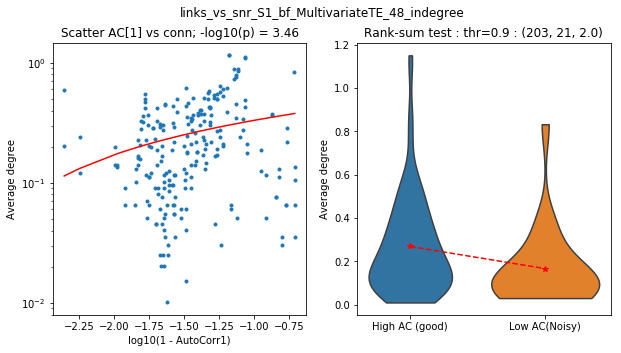

links_vs_snr_VM_MultivariateTE_48_indegree
Scatter: nData 112 -log10(Pval) 0.57
Binary: nGood 102 nNoisy 10 mu(good) 0.2 mu(noisy) 0.44 -log10(pVal) 5.11


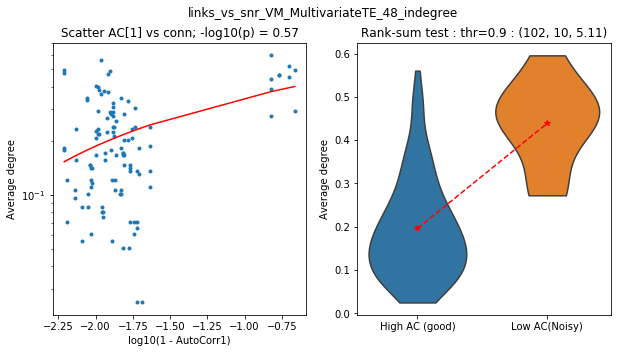

links_vs_snr_LDVL_MultivariateTE_48_indegree
Scatter: nData 112 -log10(Pval) 1.95
Binary: nGood 102 nNoisy 10 mu(good) 0.31 mu(noisy) 0.28 -log10(pVal) 0.03


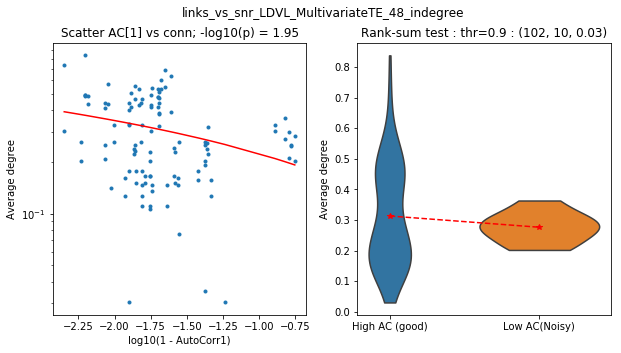

links_vs_snr_Rt_MultivariateTE_48_indegree
Scatter: nData 112 -log10(Pval) 1.12
Binary: nGood 102 nNoisy 10 mu(good) 0.43 mu(noisy) 0.81 -log10(pVal) 4.17


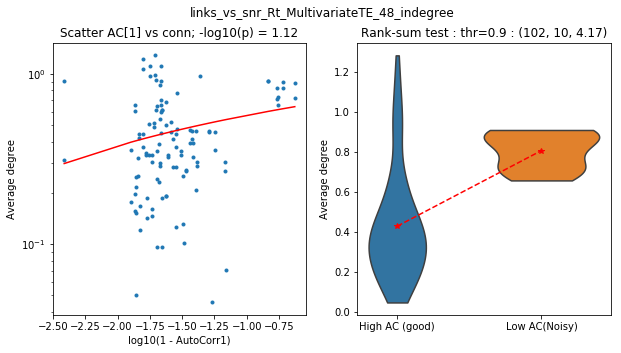

links_vs_snr_M1_MultivariateTE_48_indegree
links_vs_snr_M1_l_MultivariateTE_48_indegree
Scatter: nData 112 -log10(Pval) 6.35
Binary: nGood 98 nNoisy 14 mu(good) 0.19 mu(noisy) 0.28 -log10(pVal) 1.78


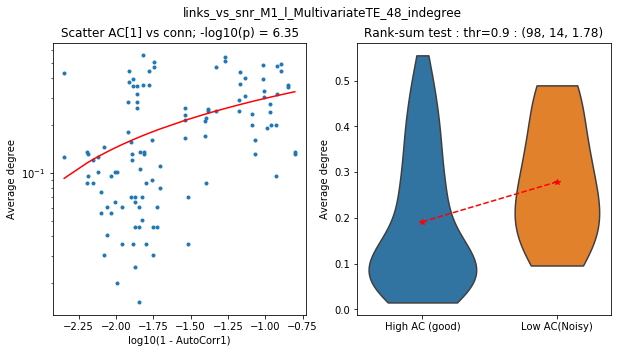

links_vs_snr_CA1_Mol_MultivariateTE_48_indegree
Scatter: nData 112 -log10(Pval) 3.77
Binary: nGood 103 nNoisy 9 mu(good) 0.2 mu(noisy) 0.31 -log10(pVal) 2.25


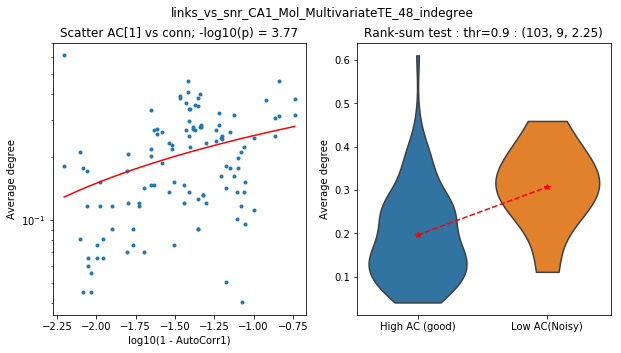

links_vs_snr_dCA1_MultivariateTE_48_indegree
Scatter: nData 112 -log10(Pval) 2.34
Binary: nGood 106 nNoisy 6 mu(good) 0.24 mu(noisy) 0.09 -log10(pVal) 1.63


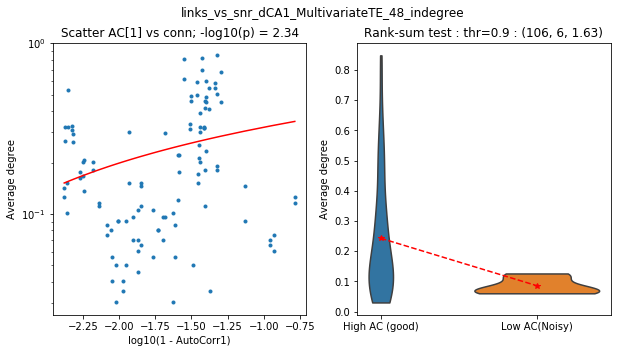

links_vs_snr_All_MultivariateTE_12_outdegree
Scatter: nData 3276 -log10(Pval) 0.94
Binary: nGood 2085 nNoisy 1191 mu(good) 0.35 mu(noisy) 0.3 -log10(pVal) 7.24


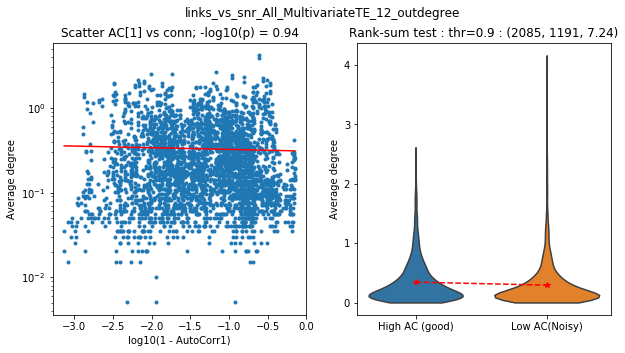

links_vs_snr_GP_MultivariateTE_12_outdegree
Scatter: nData 270 -log10(Pval) 6.61
Binary: nGood 174 nNoisy 96 mu(good) 0.46 mu(noisy) 0.23 -log10(pVal) 8.25


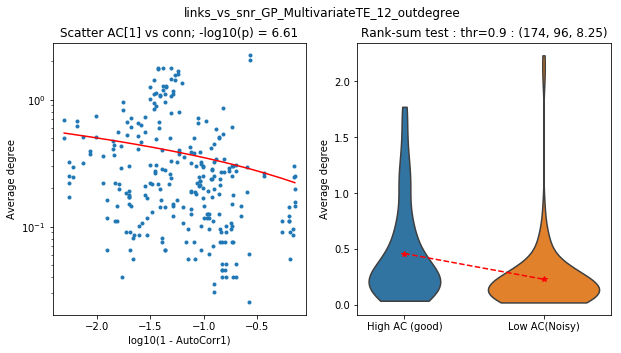

links_vs_snr_DG_MultivariateTE_12_outdegree
Scatter: nData 235 -log10(Pval) 14.53
Binary: nGood 165 nNoisy 70 mu(good) 0.29 mu(noisy) 0.48 -log10(pVal) 5.22


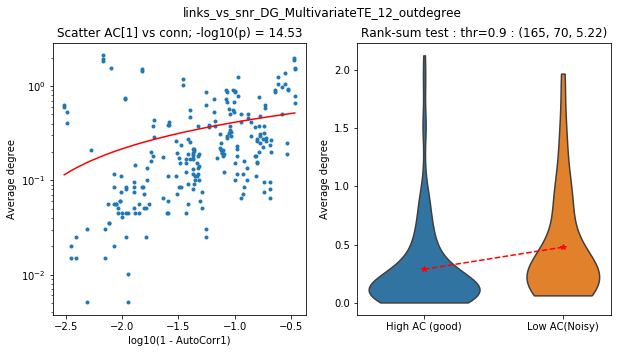

links_vs_snr_DG_a_MultivariateTE_12_outdegree
links_vs_snr_VL_MultivariateTE_12_outdegree
Scatter: nData 194 -log10(Pval) 0.51
Binary: nGood 124 nNoisy 70 mu(good) 0.4 mu(noisy) 0.37 -log10(pVal) 0.27


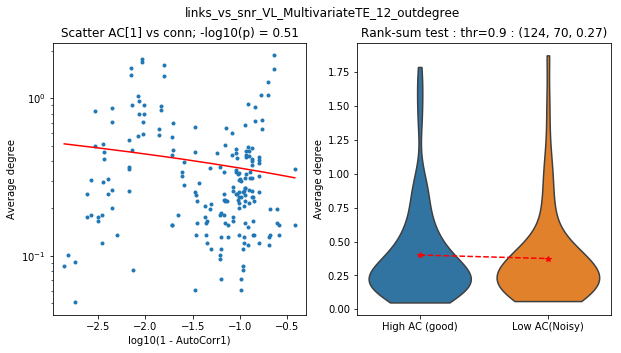

links_vs_snr_Cpu_MultivariateTE_12_outdegree
Scatter: nData 210 -log10(Pval) 0.76
Binary: nGood 131 nNoisy 79 mu(good) 0.27 mu(noisy) 0.17 -log10(pVal) 3.81


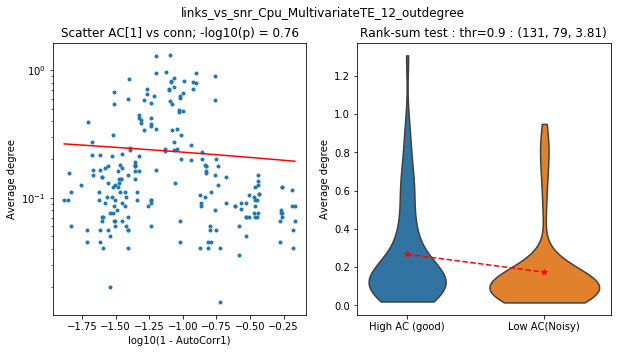

links_vs_snr_CA1_Py_MultivariateTE_12_outdegree
Scatter: nData 287 -log10(Pval) 2.09
Binary: nGood 203 nNoisy 84 mu(good) 0.33 mu(noisy) 0.21 -log10(pVal) 1.17


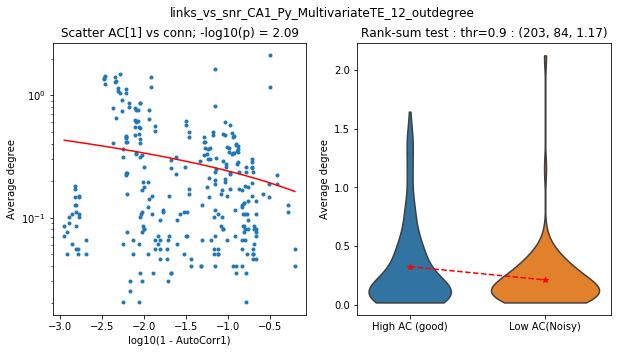

links_vs_snr_S1_bf_MultivariateTE_12_outdegree
Scatter: nData 350 -log10(Pval) 6.53
Binary: nGood 173 nNoisy 177 mu(good) 0.35 mu(noisy) 0.18 -log10(pVal) 5.99


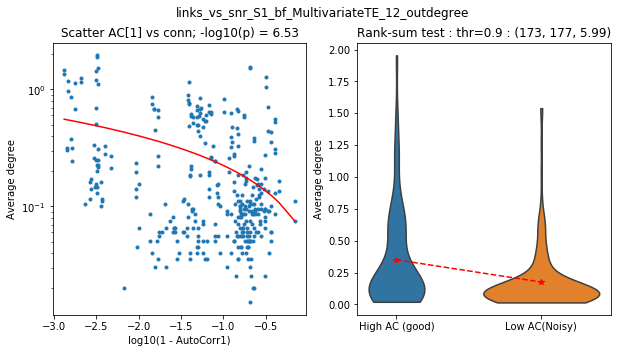

links_vs_snr_VM_MultivariateTE_12_outdegree
Scatter: nData 194 -log10(Pval) 2.15
Binary: nGood 146 nNoisy 48 mu(good) 0.45 mu(noisy) 0.4 -log10(pVal) 0.25


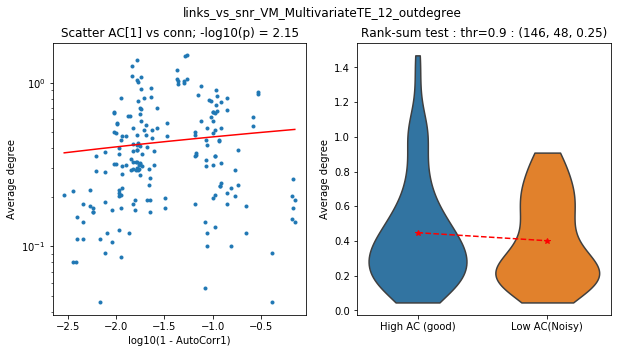

links_vs_snr_LDVL_MultivariateTE_12_outdegree
Scatter: nData 159 -log10(Pval) 7.76
Binary: nGood 69 nNoisy 90 mu(good) 0.63 mu(noisy) 0.41 -log10(pVal) 3.6


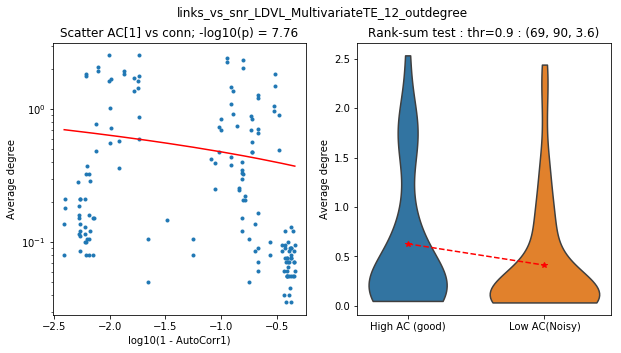

links_vs_snr_Rt_MultivariateTE_12_outdegree
Scatter: nData 235 -log10(Pval) 4.73
Binary: nGood 119 nNoisy 116 mu(good) 0.26 mu(noisy) 0.26 -log10(pVal) 2.41


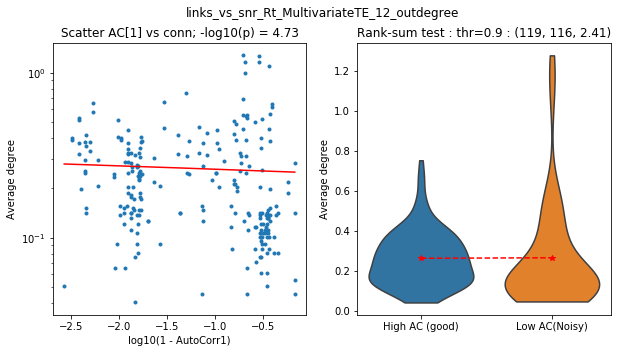

links_vs_snr_M1_MultivariateTE_12_outdegree
Scatter: nData 250 -log10(Pval) 2.52
Binary: nGood 188 nNoisy 62 mu(good) 0.32 mu(noisy) 0.28 -log10(pVal) 0.26


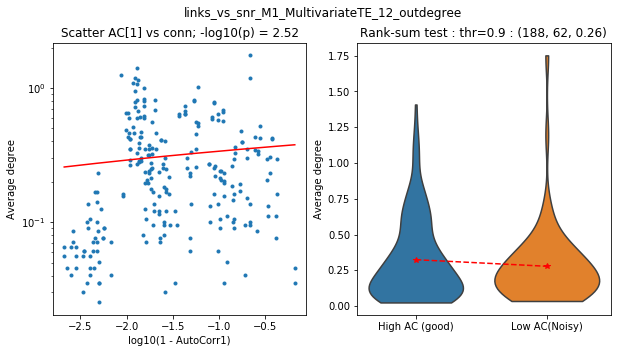

links_vs_snr_M1_l_MultivariateTE_12_outdegree
links_vs_snr_CA1_Mol_MultivariateTE_12_outdegree
Scatter: nData 182 -log10(Pval) 19.58
Binary: nGood 123 nNoisy 59 mu(good) 0.15 mu(noisy) 0.24 -log10(pVal) 7.34


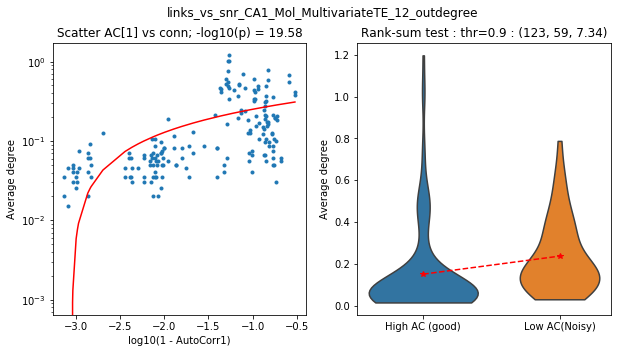

links_vs_snr_dCA1_MultivariateTE_12_outdegree
Scatter: nData 82 -log10(Pval) 0.09
Binary: nGood 55 nNoisy 27 mu(good) 0.3 mu(noisy) 0.21 -log10(pVal) 1.03


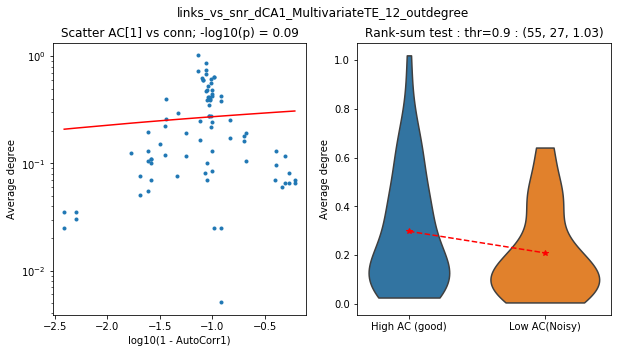

links_vs_snr_All_MultivariateTE_48_outdegree
Scatter: nData 5376 -log10(Pval) 52.34
Binary: nGood 4953 nNoisy 423 mu(good) 0.25 mu(noisy) 0.38 -log10(pVal) 36.95


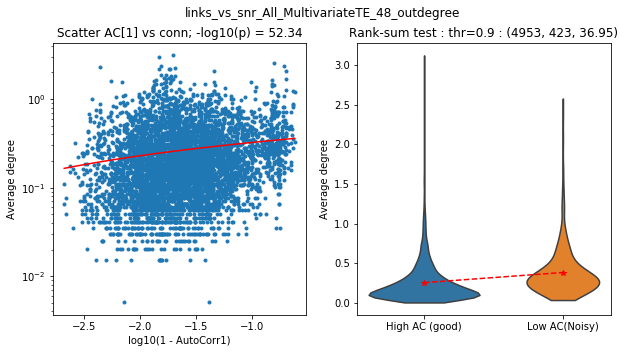

links_vs_snr_GP_MultivariateTE_48_outdegree
Scatter: nData 112 -log10(Pval) 0.08
Binary: nGood 102 nNoisy 10 mu(good) 0.15 mu(noisy) 0.42 -log10(pVal) 4.17


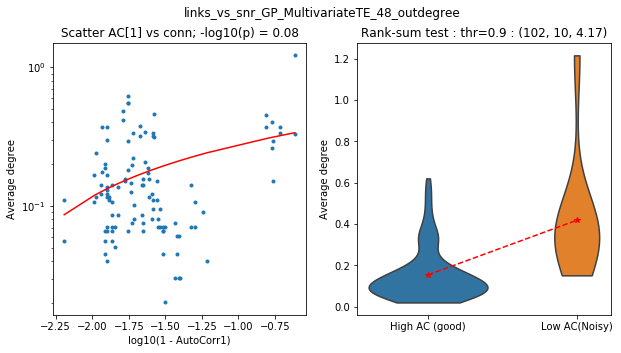

links_vs_snr_DG_MultivariateTE_48_outdegree
links_vs_snr_DG_a_MultivariateTE_48_outdegree
Scatter: nData 112 -log10(Pval) 2.97
Binary: nGood 100 nNoisy 12 mu(good) 0.28 mu(noisy) 0.25 -log10(pVal) 0.29


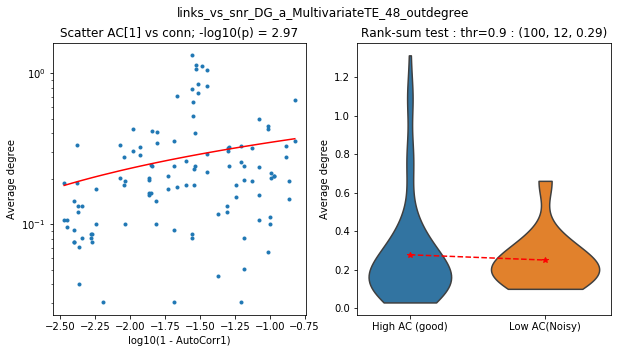

links_vs_snr_VL_MultivariateTE_48_outdegree
Scatter: nData 112 -log10(Pval) 1.44
Binary: nGood 102 nNoisy 10 mu(good) 0.33 mu(noisy) 1.1 -log10(pVal) 6.23


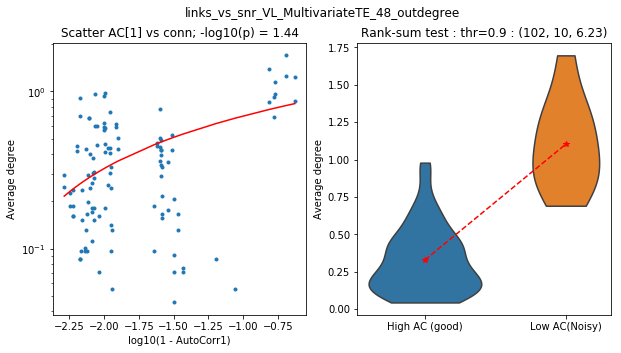

links_vs_snr_Cpu_MultivariateTE_48_outdegree
Scatter: nData 224 -log10(Pval) 4.72
Binary: nGood 202 nNoisy 22 mu(good) 0.21 mu(noisy) 0.33 -log10(pVal) 1.19


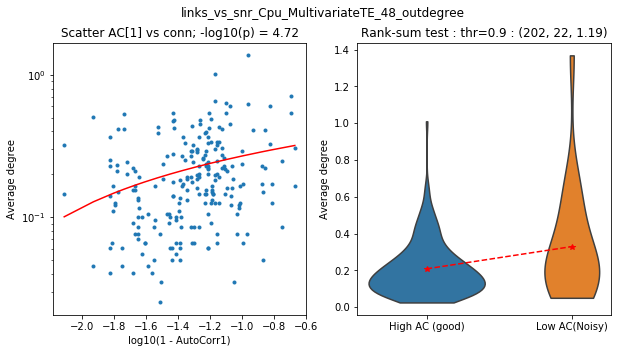

links_vs_snr_CA1_Py_MultivariateTE_48_outdegree
Scatter: nData 112 -log10(Pval) 2.59
Binary: nGood 102 nNoisy 10 mu(good) 0.34 mu(noisy) 0.24 -log10(pVal) 0.35


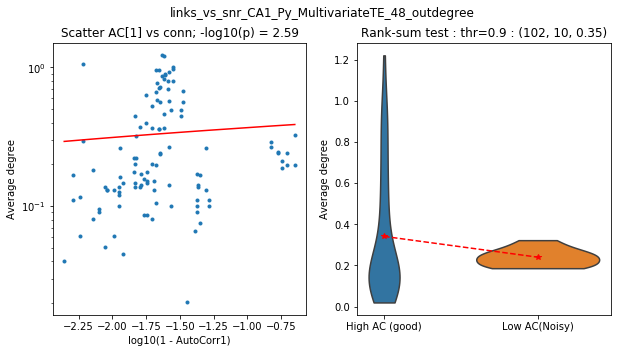

links_vs_snr_S1_bf_MultivariateTE_48_outdegree
Scatter: nData 224 -log10(Pval) 0.61
Binary: nGood 203 nNoisy 21 mu(good) 0.26 mu(noisy) 0.38 -log10(pVal) 0.77


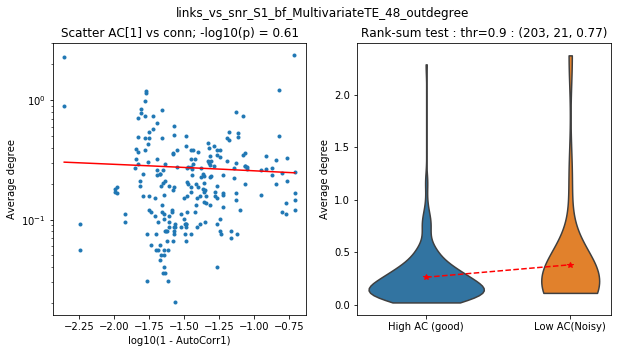

links_vs_snr_VM_MultivariateTE_48_outdegree
Scatter: nData 112 -log10(Pval) 0.37
Binary: nGood 102 nNoisy 10 mu(good) 0.4 mu(noisy) 0.44 -log10(pVal) 1.85


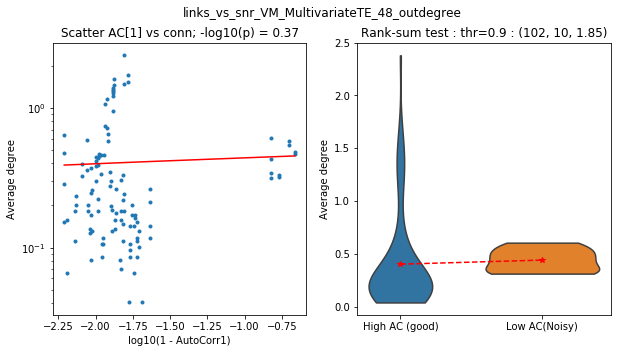

links_vs_snr_LDVL_MultivariateTE_48_outdegree
Scatter: nData 112 -log10(Pval) 2.31
Binary: nGood 102 nNoisy 10 mu(good) 0.37 mu(noisy) 0.55 -log10(pVal) 2.33


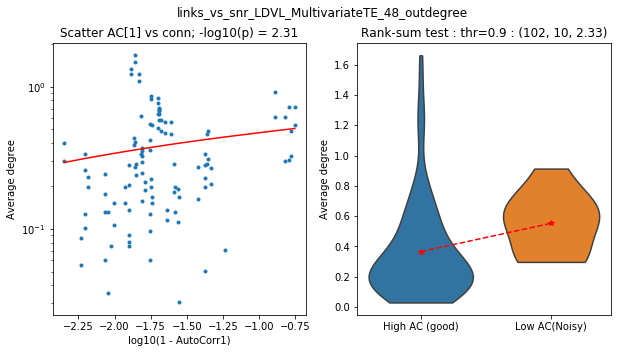

links_vs_snr_Rt_MultivariateTE_48_outdegree
Scatter: nData 112 -log10(Pval) 0.04
Binary: nGood 102 nNoisy 10 mu(good) 0.27 mu(noisy) 0.33 -log10(pVal) 1.53


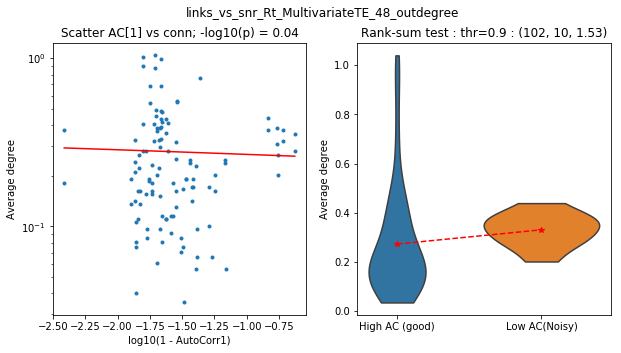

links_vs_snr_M1_MultivariateTE_48_outdegree
links_vs_snr_M1_l_MultivariateTE_48_outdegree
Scatter: nData 112 -log10(Pval) 2.19
Binary: nGood 98 nNoisy 14 mu(good) 0.13 mu(noisy) 0.15 -log10(pVal) 0.87


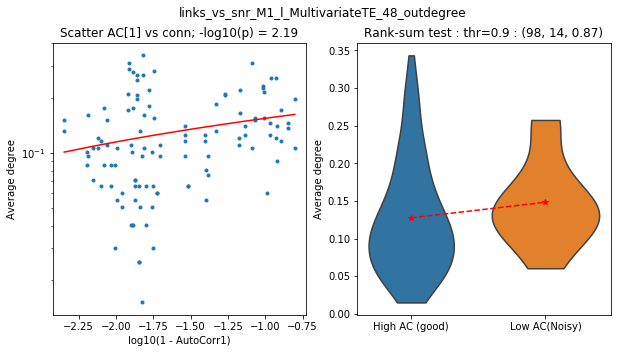

links_vs_snr_CA1_Mol_MultivariateTE_48_outdegree
Scatter: nData 112 -log10(Pval) 9.11
Binary: nGood 103 nNoisy 9 mu(good) 0.32 mu(noisy) 0.31 -log10(pVal) 0.67


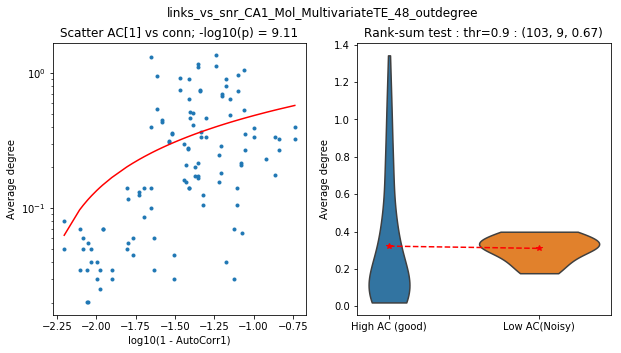

links_vs_snr_dCA1_MultivariateTE_48_outdegree
Scatter: nData 112 -log10(Pval) 0.92
Binary: nGood 106 nNoisy 6 mu(good) 0.34 mu(noisy) 0.05 -log10(pVal) 3.3


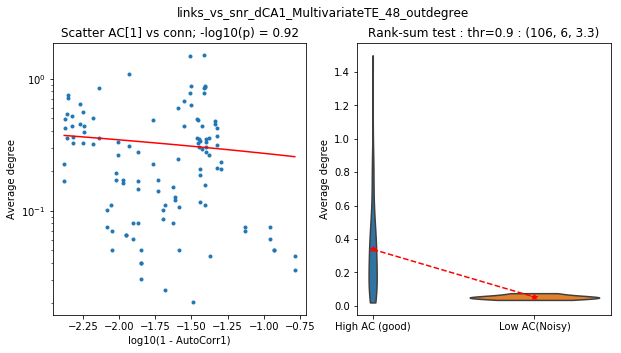

links_vs_snr_All_MultivariateTE_12_totdegree
Scatter: nData 3276 -log10(Pval) 6.99
Binary: nGood 2085 nNoisy 1191 mu(good) 0.63 mu(noisy) 0.7 -log10(pVal) 0.96


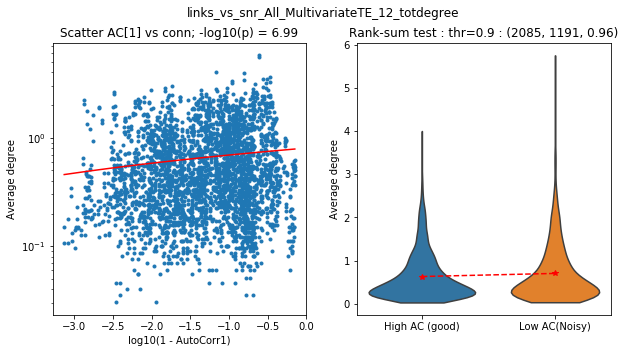

links_vs_snr_GP_MultivariateTE_12_totdegree
Scatter: nData 270 -log10(Pval) 4.12
Binary: nGood 174 nNoisy 96 mu(good) 0.72 mu(noisy) 0.47 -log10(pVal) 5.3


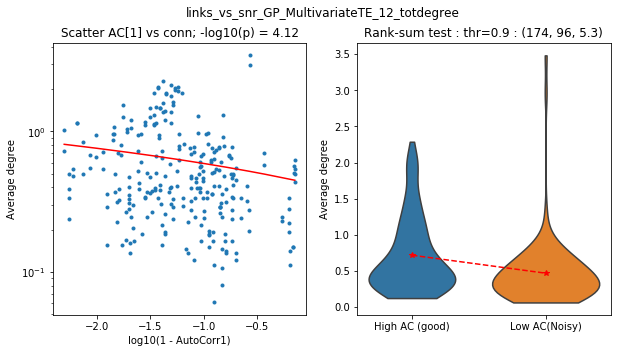

links_vs_snr_DG_MultivariateTE_12_totdegree
Scatter: nData 235 -log10(Pval) 13.88
Binary: nGood 165 nNoisy 70 mu(good) 0.46 mu(noisy) 0.92 -log10(pVal) 4.98


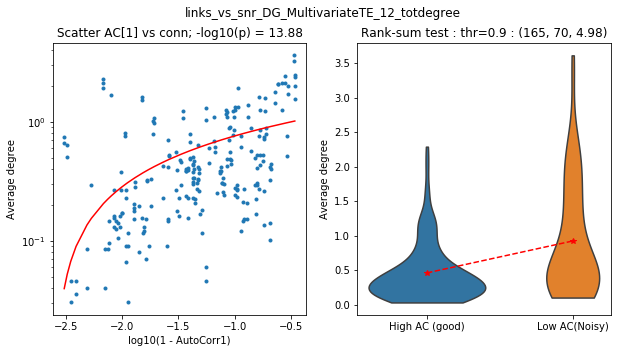

links_vs_snr_DG_a_MultivariateTE_12_totdegree
links_vs_snr_VL_MultivariateTE_12_totdegree
Scatter: nData 194 -log10(Pval) 1.17
Binary: nGood 124 nNoisy 70 mu(good) 0.7 mu(noisy) 0.85 -log10(pVal) 1.31


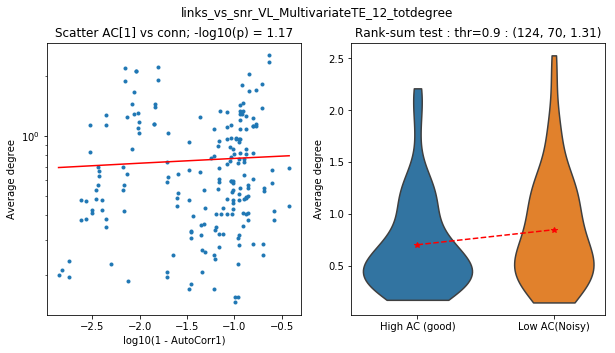

links_vs_snr_Cpu_MultivariateTE_12_totdegree
Scatter: nData 210 -log10(Pval) 3.81
Binary: nGood 131 nNoisy 79 mu(good) 0.47 mu(noisy) 0.54 -log10(pVal) 0.44


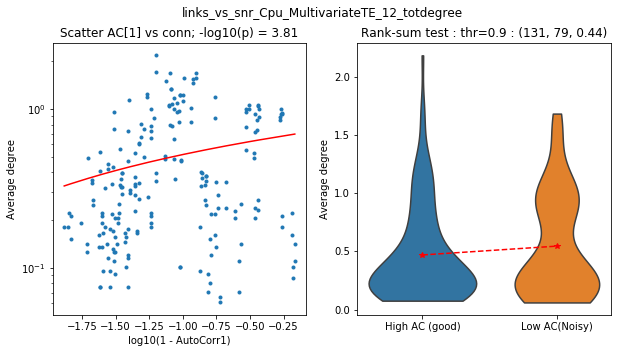

links_vs_snr_CA1_Py_MultivariateTE_12_totdegree
Scatter: nData 287 -log10(Pval) 0.6
Binary: nGood 203 nNoisy 84 mu(good) 0.57 mu(noisy) 0.57 -log10(pVal) 0.06


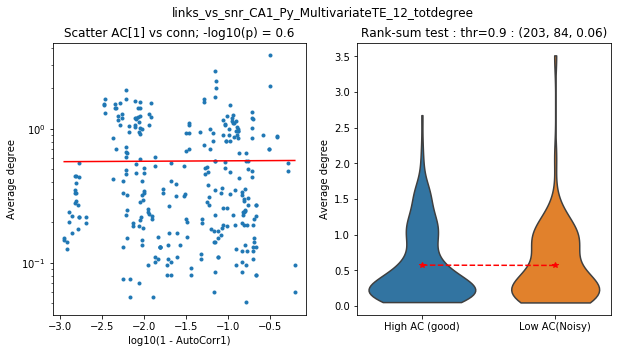

links_vs_snr_S1_bf_MultivariateTE_12_totdegree
Scatter: nData 350 -log10(Pval) 2.48
Binary: nGood 173 nNoisy 177 mu(good) 0.65 mu(noisy) 0.43 -log10(pVal) 3.61


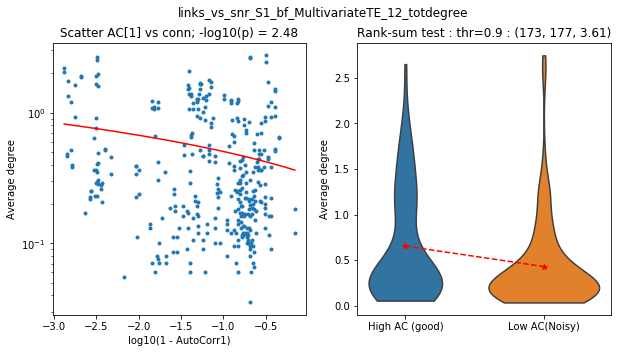

links_vs_snr_VM_MultivariateTE_12_totdegree
Scatter: nData 194 -log10(Pval) 2.32
Binary: nGood 146 nNoisy 48 mu(good) 0.84 mu(noisy) 0.74 -log10(pVal) 0.02


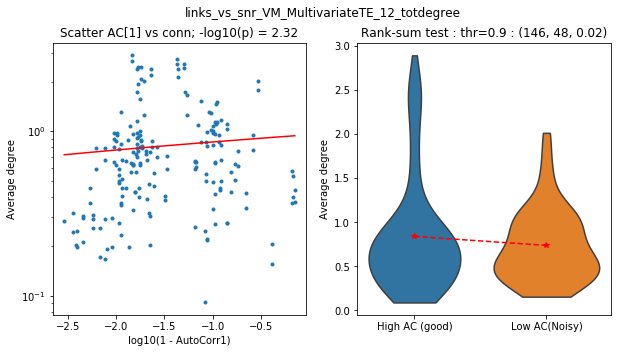

links_vs_snr_LDVL_MultivariateTE_12_totdegree
Scatter: nData 159 -log10(Pval) 3.2
Binary: nGood 69 nNoisy 90 mu(good) 0.89 mu(noisy) 0.83 -log10(pVal) 1.7


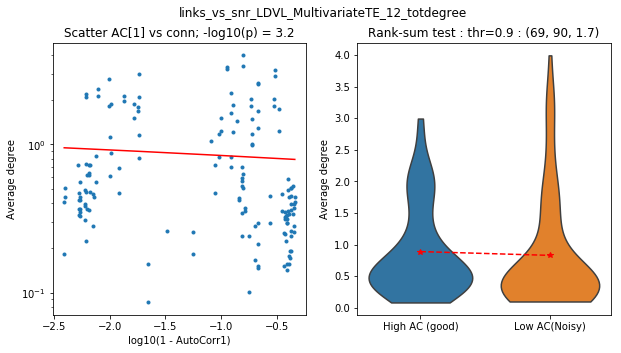

links_vs_snr_Rt_MultivariateTE_12_totdegree
Scatter: nData 235 -log10(Pval) 0.51
Binary: nGood 119 nNoisy 116 mu(good) 0.5 mu(noisy) 0.67 -log10(pVal) 1.34


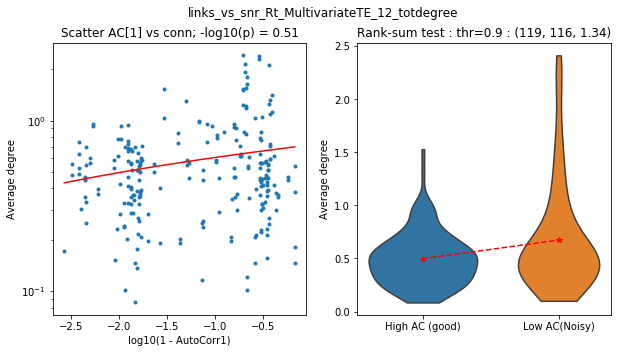

links_vs_snr_M1_MultivariateTE_12_totdegree
Scatter: nData 250 -log10(Pval) 4.64
Binary: nGood 188 nNoisy 62 mu(good) 0.63 mu(noisy) 0.74 -log10(pVal) 0.59


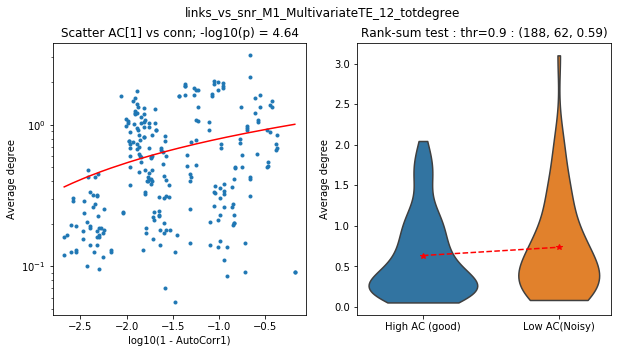

links_vs_snr_M1_l_MultivariateTE_12_totdegree
links_vs_snr_CA1_Mol_MultivariateTE_12_totdegree
Scatter: nData 182 -log10(Pval) 8.08
Binary: nGood 123 nNoisy 59 mu(good) 0.35 mu(noisy) 0.52 -log10(pVal) 4.43


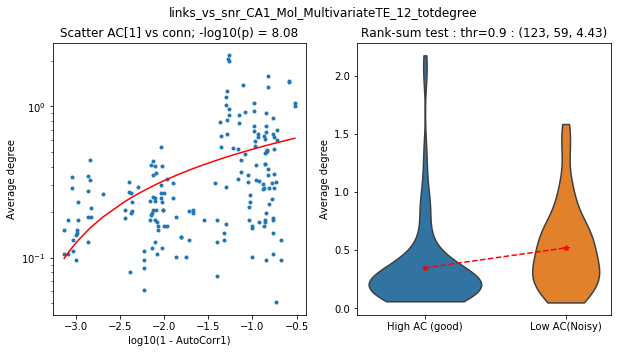

links_vs_snr_dCA1_MultivariateTE_12_totdegree
Scatter: nData 82 -log10(Pval) 2.37
Binary: nGood 55 nNoisy 27 mu(good) 0.71 mu(noisy) 0.76 -log10(pVal) 0.35


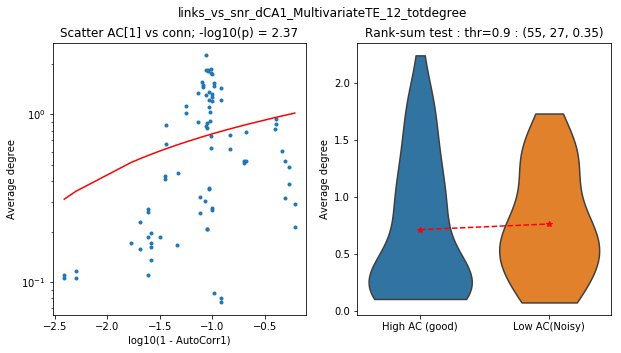

links_vs_snr_All_MultivariateTE_48_totdegree
Scatter: nData 5376 -log10(Pval) 86.79
Binary: nGood 4953 nNoisy 423 mu(good) 0.51 mu(noisy) 0.81 -log10(pVal) 55.68


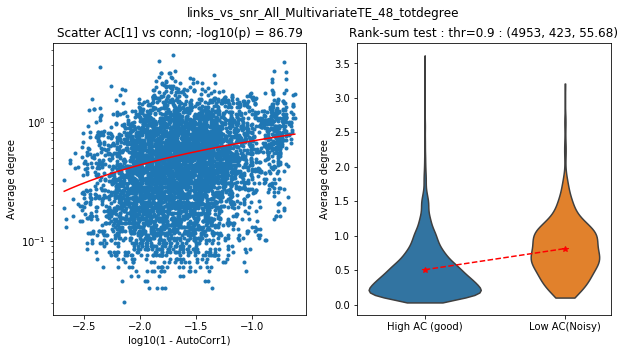

links_vs_snr_GP_MultivariateTE_48_totdegree
Scatter: nData 112 -log10(Pval) 0.17
Binary: nGood 102 nNoisy 10 mu(good) 0.4 mu(noisy) 1.15 -log10(pVal) 5.98


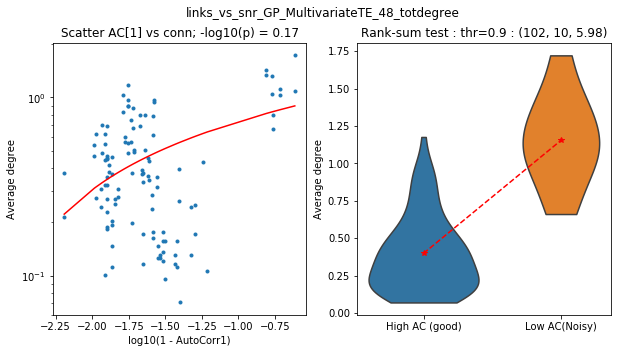

links_vs_snr_DG_MultivariateTE_48_totdegree
links_vs_snr_DG_a_MultivariateTE_48_totdegree
Scatter: nData 112 -log10(Pval) 6.75
Binary: nGood 100 nNoisy 12 mu(good) 0.67 mu(noisy) 0.79 -log10(pVal) 1.31


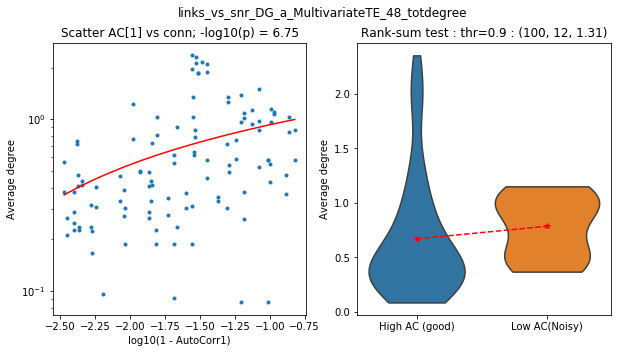

links_vs_snr_VL_MultivariateTE_48_totdegree
Scatter: nData 112 -log10(Pval) 2.77
Binary: nGood 102 nNoisy 10 mu(good) 0.63 mu(noisy) 1.58 -log10(pVal) 6.35


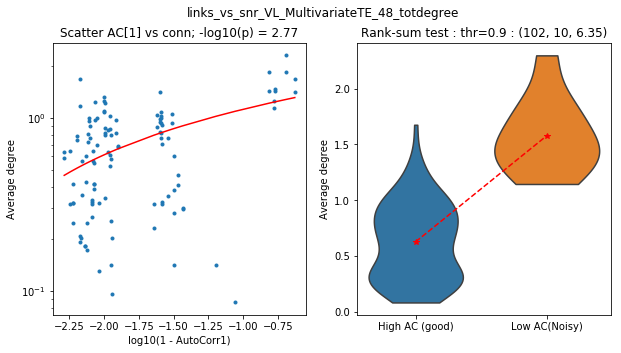

links_vs_snr_Cpu_MultivariateTE_48_totdegree
Scatter: nData 224 -log10(Pval) 3.83
Binary: nGood 202 nNoisy 22 mu(good) 0.39 mu(noisy) 0.48 -log10(pVal) 0.63


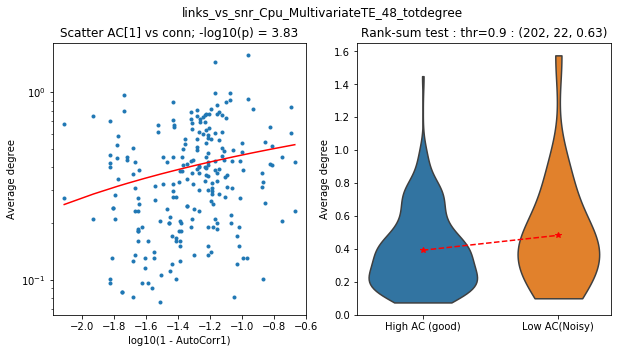

links_vs_snr_CA1_Py_MultivariateTE_48_totdegree
Scatter: nData 112 -log10(Pval) 10.25
Binary: nGood 102 nNoisy 10 mu(good) 0.67 mu(noisy) 0.91 -log10(pVal) 1.56


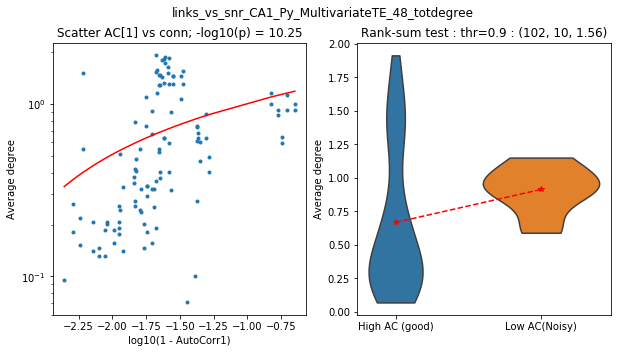

links_vs_snr_S1_bf_MultivariateTE_48_totdegree
Scatter: nData 224 -log10(Pval) 1.73
Binary: nGood 203 nNoisy 21 mu(good) 0.53 mu(noisy) 0.55 -log10(pVal) 0.26


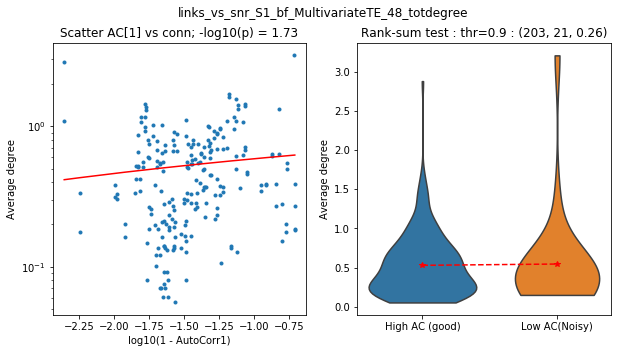

links_vs_snr_VM_MultivariateTE_48_totdegree
Scatter: nData 112 -log10(Pval) 0.04
Binary: nGood 102 nNoisy 10 mu(good) 0.6 mu(noisy) 0.88 -log10(pVal) 2.46


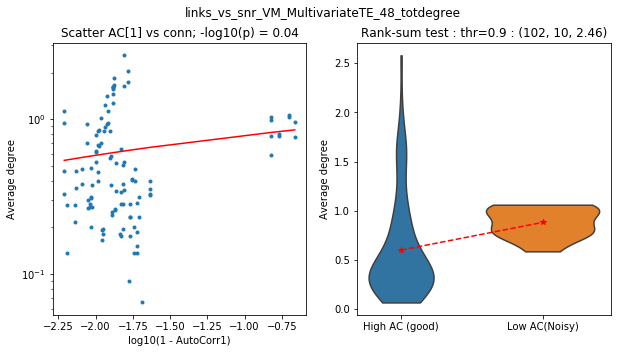

links_vs_snr_LDVL_MultivariateTE_48_totdegree
Scatter: nData 112 -log10(Pval) 0.1
Binary: nGood 102 nNoisy 10 mu(good) 0.68 mu(noisy) 0.83 -log10(pVal) 1.38


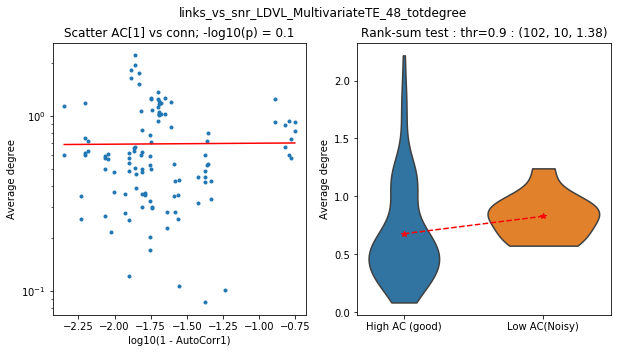

links_vs_snr_Rt_MultivariateTE_48_totdegree
Scatter: nData 112 -log10(Pval) 0.7
Binary: nGood 102 nNoisy 10 mu(good) 0.7 mu(noisy) 1.14 -log10(pVal) 3.5


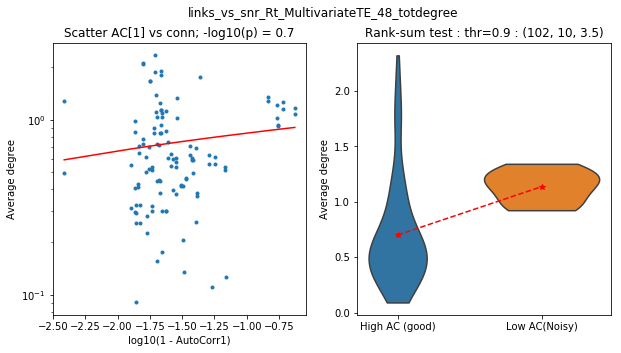

links_vs_snr_M1_MultivariateTE_48_totdegree
links_vs_snr_M1_l_MultivariateTE_48_totdegree
Scatter: nData 112 -log10(Pval) 5.15
Binary: nGood 98 nNoisy 14 mu(good) 0.32 mu(noisy) 0.43 -log10(pVal) 1.73


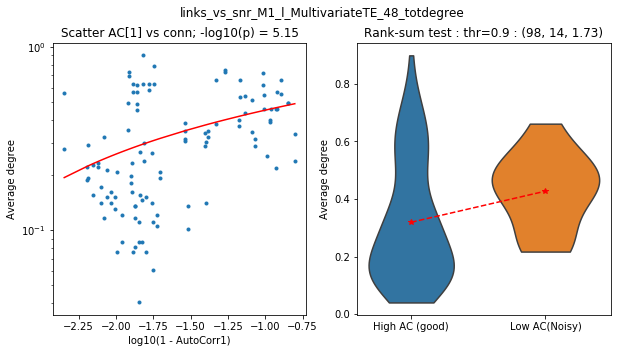

links_vs_snr_CA1_Mol_MultivariateTE_48_totdegree
Scatter: nData 112 -log10(Pval) 7.86
Binary: nGood 103 nNoisy 9 mu(good) 0.52 mu(noisy) 0.62 -log10(pVal) 1.04


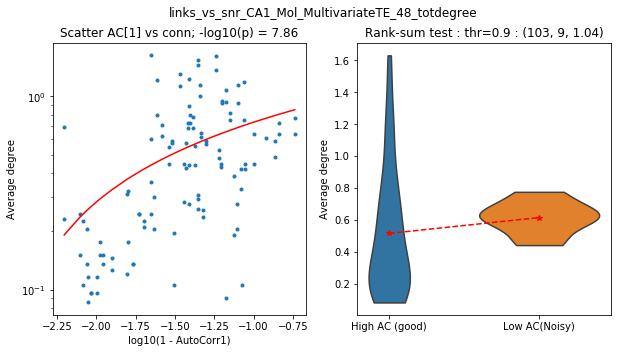

links_vs_snr_dCA1_MultivariateTE_48_totdegree
Scatter: nData 112 -log10(Pval) 0.25
Binary: nGood 106 nNoisy 6 mu(good) 0.58 mu(noisy) 0.14 -log10(pVal) 3.21


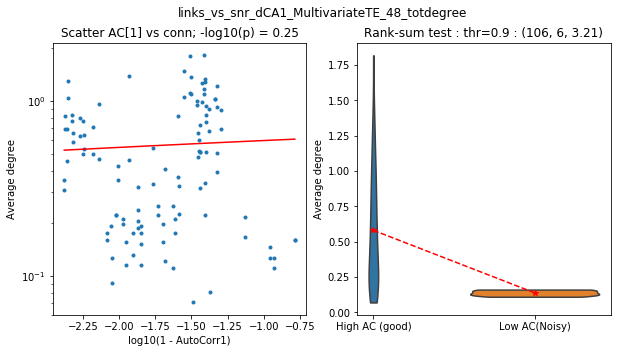

In [34]:
def plot_snr_nlink_scatter(ax, snrArr, degArr):
    negLogPVal = np.round(-np.log10(spearmanr(snrArr, degArr)[1]), 2)
    print("Scatter: nData", len(snrArr), "-log10(Pval)", negLogPVal)

    # Convert SNR to logarithmic scale
    snrLogArr = np.log10(1 - np.array(snrArr))

    # Sort in SNR-ascending order
    idxsSort = np.argsort(snrLogArr)
    snrLogArr = snrLogArr[idxsSort]
    degEffArr = degArr[idxsSort]      # Make sure not to overwrite original array

    ax.set_title("Scatter AC[1] vs conn; -log10(p) = " + str(negLogPVal))
    ax.set_xlabel("log10(1 - AutoCorr1)")
    ax.set_ylabel("Average degree")
    ax.semilogy(snrLogArr, degEffArr, '.')

    # Fit polynomial
    coef = np.polyfit(snrLogArr, degEffArr, 1)
    poly1d_fn = np.poly1d(coef)
    ax.plot(snrLogArr, poly1d_fn(snrLogArr), 'r')

#     xFit, yFit = fit_sliding_window(snrLogArr, degEffArr, 0.5, 100)
#     ax.plot(xFit, yFit, '--r')


def plot_snr_nlink_violins(ax, snrArr, degArr, acTHR):
    idxNoisy = snrArr < acTHR

    degGood = degArr[~idxNoisy]
    degNoisy = degArr[idxNoisy]
    pVal = mannwhitneyu(degGood, degNoisy, alternative="two-sided")[1]

    nGood = len(degGood)
    nNoisy = len(degNoisy)
    muGood = np.round(np.mean(degGood), 2)
    muNoisy = np.round(np.mean(degNoisy), 2)
    negLogPVal = np.round(-np.log10(pVal), 2)
    
    print("Binary:",
          "nGood", nGood,
          "nNoisy", nNoisy,
          "mu(good)", muGood,
          "mu(noisy)", muNoisy,
          "-log10(pVal)", negLogPVal)

    rsDict = {"High AC (good)" : degGood, "Low AC(Noisy)" : degNoisy}
    rsDF = pandas_df_from_dict_non_uniform(rsDict)

    ax.set_title("Rank-sum test : thr="+str(acTHR) + " : " + str((nGood, nNoisy, negLogPVal)))
    sns.violinplot(ax=ax, data=rsDF, cut=0, inner=None)
    ax.plot([0, 1], [np.mean(degGood), np.mean(degNoisy)], '*--r')
    ax.set_ylabel("Average degree")
#     ax.set_yscale("log")
    

def test_links_vs_snr(mice, fcMethodName, connfunc, channelName=None, filterSNR=None, acTHR=0.9, figname="figure", rangeSec=None):
    mc = MetricCalculator(serial=True, verbose=False)

    snrLst = []
    degLst = []
    for mousename in sorted(mice):
        sessionsDF = dataDB.get_rows('neuro', {"mousename" : mousename})
        for idxNeuro, rowNeuro in sessionsDF.iterrows():
            dataNeuro = np.copy(dataDB.dataNeuronal[idxNeuro])

            if channelName is not None:
                labelsThis = dataDB.get_channel_labels(mousename)
                idxsSpecial = np.where([l == channelName for l in labelsThis])[0]
                dataNeuro = dataNeuro[:, :, idxsSpecial]
#                 print('--', mousename, idxsSpecial, dataNeuro.shape)

            if dataNeuro.shape[2] > 0:
                # Compute channel-wise autocorrelation
                mc.set_data(dataNeuro, 'rsp')
                snrByChannel = mc.metric3D("autocorr_d1", 'p')

                if not isinstance(snrByChannel, np.ndarray):
                    snrByChannel = np.array([snrByChannel])

                thisSessionDFTE = dataDB.get_rows('TE', {"mousekey" : rowNeuro['mousekey'], "method" : fcMethodName})
                for idxTE, rowTE in thisSessionDFTE.iterrows():
                    timesFC, dataFC = dataDB.get_fc_data(idxTE, rangeSec=rangeSec)

                    # Compute average channel-wise in-degree
                    binaryConn = connectomics.is_conn(dataFC[2], 0.01)
                    inDegreeLst = [connfunc(binaryConn[:, :, i]) for i in range(len(timesFC))]
                    avgInDegree = np.mean(inDegreeLst, axis=0)

                    if channelName is None:
                        for snr, deg in zip(snrByChannel, avgInDegree):
                            snrLst += [snr]
                            degLst += [deg]
                    else:
                        for iIdx, idxSpecial in enumerate(idxsSpecial):
                            snrLst += [snrByChannel[iIdx]]
                            degLst += [avgInDegree[idxSpecial]]
                            
    if len(snrLst) == 0:
        print("Warning:", figname, "is empty")
    else:
        snrArr = np.array(snrLst)
        degArr = np.array(degLst)

        if filterSNR is not None:
            idxFilter = snrArr > filterSNR
            snrArr = snrArr[idxFilter]
            degArr = degArr[idxFilter]

        ###################################
        # Plot
        ###################################

        fig, ax = plt.subplots(ncols=2, figsize=(10,5))
        fig.suptitle(figname)

        plot_snr_nlink_scatter(ax[0], snrArr, degArr)

        plot_snr_nlink_violins(ax[1], snrArr, degArr, acTHR)

        plt.savefig(figname+".pdf")
        plt.show()




metricDict = {
    "indegree" : connectomics.degree_in,
    "outdegree" : connectomics.degree_out,
    "totdegree" : connectomics.degree_tot
}

miceDict = {
    "12" : mice12,
    "48" : mice48
}

channelNameLst = [None, 'GP', 'DG', 'DG_a', 'VL', 'Cpu', 'CA1_Py', 'S1_bf', 'VM', 'LDVL', 'Rt', 'M1', 'M1_l', 'CA1_Mol', 'dCA1']
# channelNameLst = [None]

for metricName, metricFunc in metricDict.items():
    for miceName, miceList in miceDict.items():
        for methodFC in ['MultivariateTE']:  # , 'BivariateTE'
            for channelName in channelNameLst:
                effName = 'All' if channelName is None else channelName
                figname = "links_vs_snr_" + '_'.join([effName, methodFC, miceName, metricName])
                print(figname)
                test_links_vs_snr(miceList, methodFC, metricFunc,
                                  acTHR=0.9, channelName=channelName, figname=figname, rangeSec=None) # [3.0, 3.5]